## ✅ Step 1 load the MCX data into a DataFrame.


In [2]:
import pandas as pd
df=pd.read_csv("MCX_TRADE.csv")

In [3]:
df

,Instrument Type,Date,Traded Contract(Lots),Total Value (Lacs),Premium Value (Lacs)
0,FUTCOM,01 Jan 2024,55674,193162.71,-
1,FUTIDX,01 Jan 2024,21,172.25,-
2,OPTFUT,01 Jan 2024,150532,840919.24,-
3,FUTIDX,02 Jan 2024,308,2533.69,-
4,FUTCOM,02 Jan 2024,595985,2020450.36,-
...,...,...,...,...,...
6864,OPTFUT,07 Jul 2025,3373566,19587718.89,367470.82
6865,FUTCOM,07 Jul 2025,663300,2878405.29,-
6866,OPTFUT,08 Jul 2025,3275049,19918411.74,352173.52
6867,FUTCOM,08 Jul 2025,665543,3309616.77,-


## Next, let’s:

    Inspect the column names
    
    Check for missing values
    
    Understand data types

In [5]:
df.columns

Index(['Instrument Type', 'Date', 'Traded Contract(Lots)',
       'Total Value (Lacs)', 'Premium Value (Lacs)'],
      dtype='object')

In [6]:
df.isna().sum()

Instrument Type          0
Date                     0
Traded Contract(Lots)    0
Total Value (Lacs)       0
Premium Value (Lacs)     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6869 entries, 0 to 6868
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Instrument Type        6869 non-null   object 
 1   Date                   6869 non-null   object 
 2   Traded Contract(Lots)  6869 non-null   int64  
 3   Total Value (Lacs)     6869 non-null   float64
 4   Premium Value (Lacs)   6869 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 268.4+ KB


## Step 2: Data Cleaning
Convert 'Date' column to datetime with dayfirst format

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

In [10]:
df['Premium Value (Lacs)']

0               -
1               -
2               -
3               -
4               -
          ...    
6864    367470.82
6865            -
6866    352173.52
6867            -
6868            -
Name: Premium Value (Lacs), Length: 6869, dtype: object

In [11]:
df.shape

(6869, 5)

In [12]:
# Replace '-' with NaN in 'Premium Value (Lacs)' and convert to float
if 'Premium Value (Lacs)' in df.columns:
    df['Premium Value (Lacs)'] = df['Premium Value (Lacs)'].replace('-', pd.NA)
    df['Premium Value (Lacs)'] = pd.to_numeric(df['Premium Value (Lacs)'], errors='coerce')

In [13]:
df['Premium Value (Lacs)']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
6864    367470.82
6865          NaN
6866    352173.52
6867          NaN
6868          NaN
Name: Premium Value (Lacs), Length: 6869, dtype: float64

Drop rows where Date conversion failed

In [15]:
df = df.dropna(subset=['Date'])

Sort the dataframe by date

In [17]:
df = df.sort_values(by='Date')

Set Date as index

In [19]:
df.set_index('Date', inplace=True)

Confirm the changes

In [21]:
print("\nIndex and Data Types After Cleaning and Sorting:")
print(df.index)


Index and Data Types After Cleaning and Sorting:
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-07', '2013-01-08', '2013-01-09',
               '2013-01-10', '2013-01-11',
               ...
               '2025-07-03', '2025-07-04', '2025-07-04', '2025-07-04',
               '2025-07-07', '2025-07-07', '2025-07-07', '2025-07-08',
               '2025-07-08', '2025-07-08'],
              dtype='datetime64[ns]', name='Date', length=6869, freq=None)


In [22]:
print(df.dtypes)

Instrument Type           object
Traded Contract(Lots)      int64
Total Value (Lacs)       float64
Premium Value (Lacs)     float64
dtype: object


## Step 3: Line Plot - Time Series Trends


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

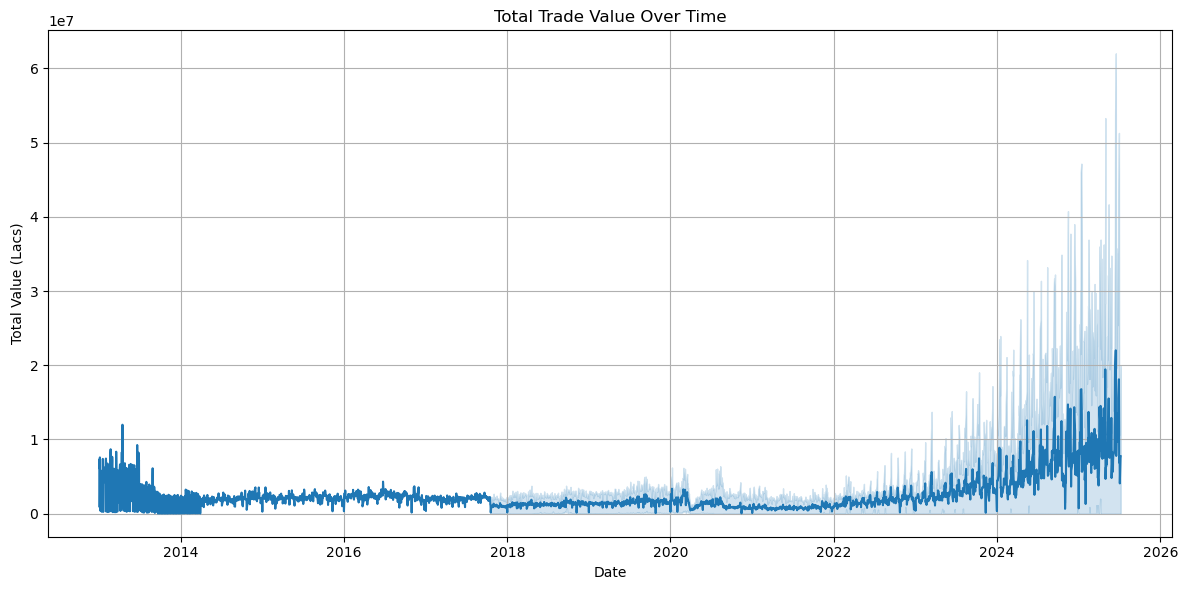

In [25]:
if 'Total Value (Lacs)' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=df.index, y='Total Value (Lacs)')
    plt.title('Total Trade Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Value (Lacs)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

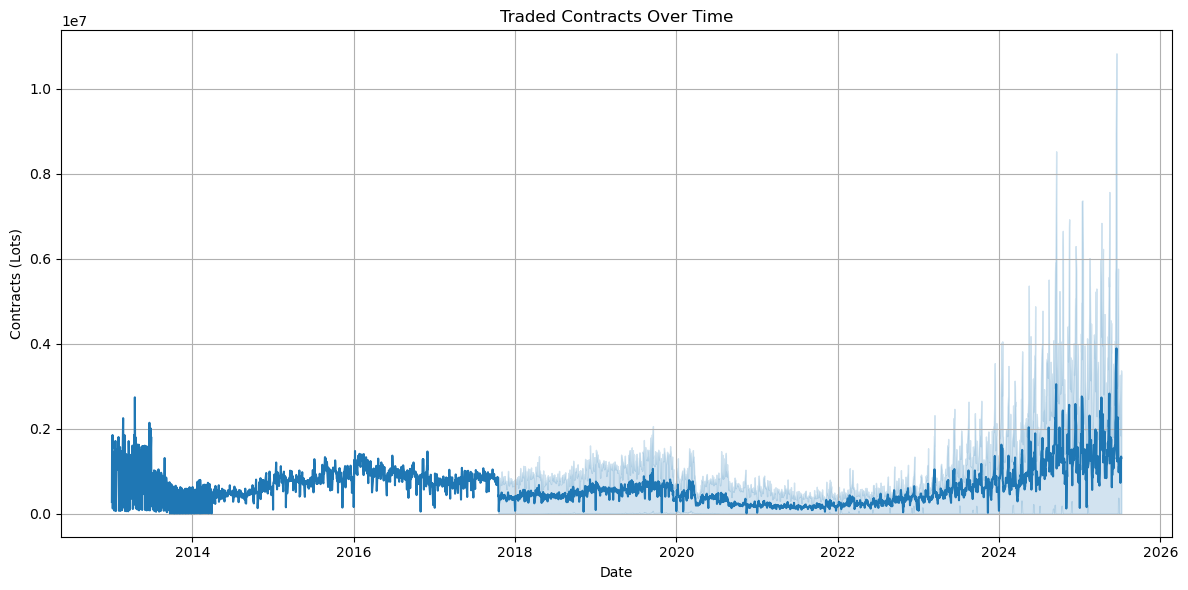

In [26]:
if 'Traded Contract(Lots)' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=df.index, y='Traded Contract(Lots)')
    plt.title('Traded Contracts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Contracts (Lots)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

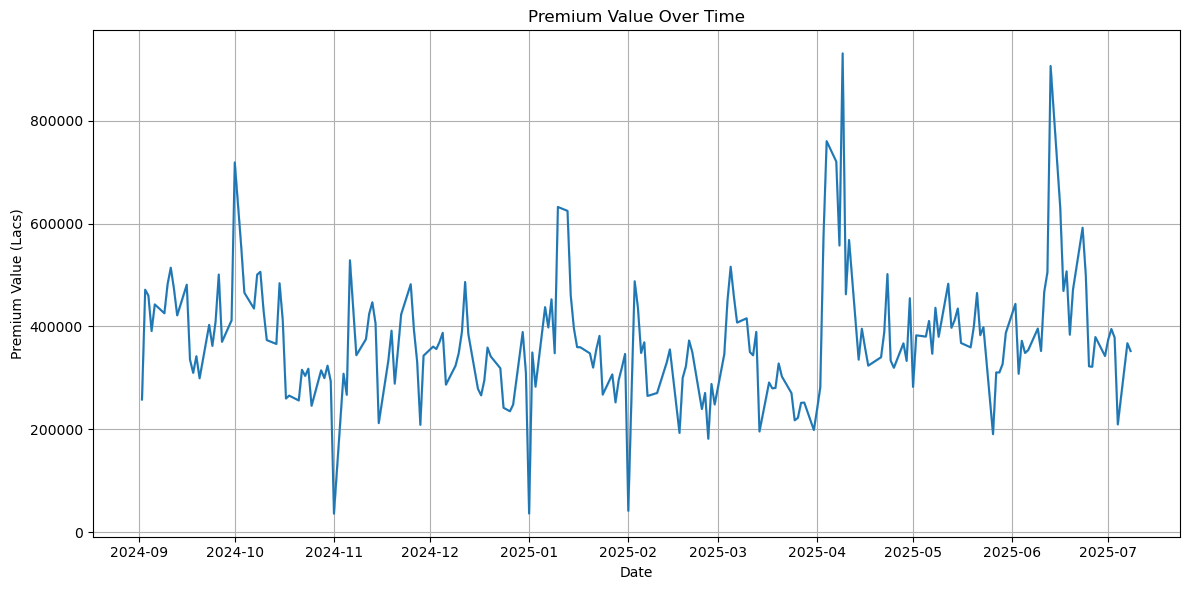

In [27]:
if 'Premium Value (Lacs)' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=df.index, y='Premium Value (Lacs)')
    plt.title('Premium Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Premium Value (Lacs)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Step 4: Rolling Averages

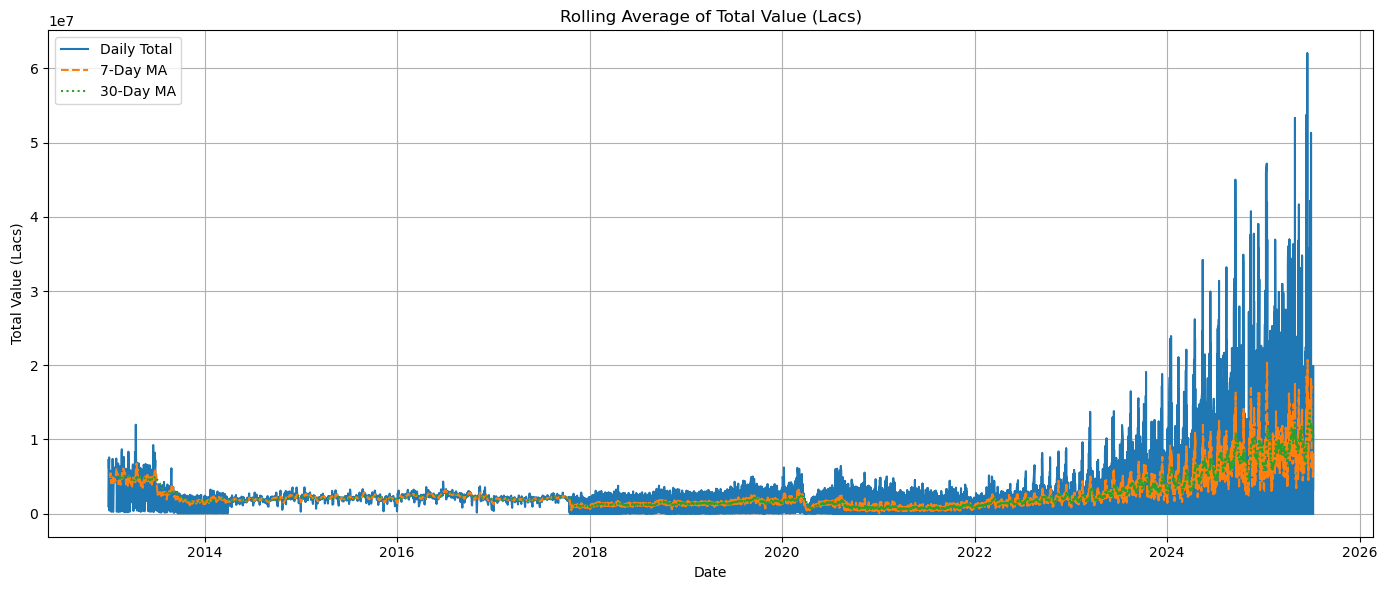

In [49]:
if 'Total Value (Lacs)' in df.columns:
    df['Rolling_Total_7'] = df['Total Value (Lacs)'].rolling(window=7).mean()
    df['Rolling_Total_30'] = df['Total Value (Lacs)'].rolling(window=30).mean()
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Total Value (Lacs)'], label='Daily Total')
    plt.plot(df.index, df['Rolling_Total_7'], label='7-Day MA', linestyle='--')
    plt.plot(df.index, df['Rolling_Total_30'], label='30-Day MA', linestyle=':')
    plt.title('Rolling Average of Total Value (Lacs)')
    plt.xlabel('Date')
    plt.ylabel('Total Value (Lacs)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Step 5: Grouping by Week and Month

In [54]:
weekly_df = df.resample('W').sum(numeric_only=True)
monthly_df = df.resample('ME').sum(numeric_only=True)

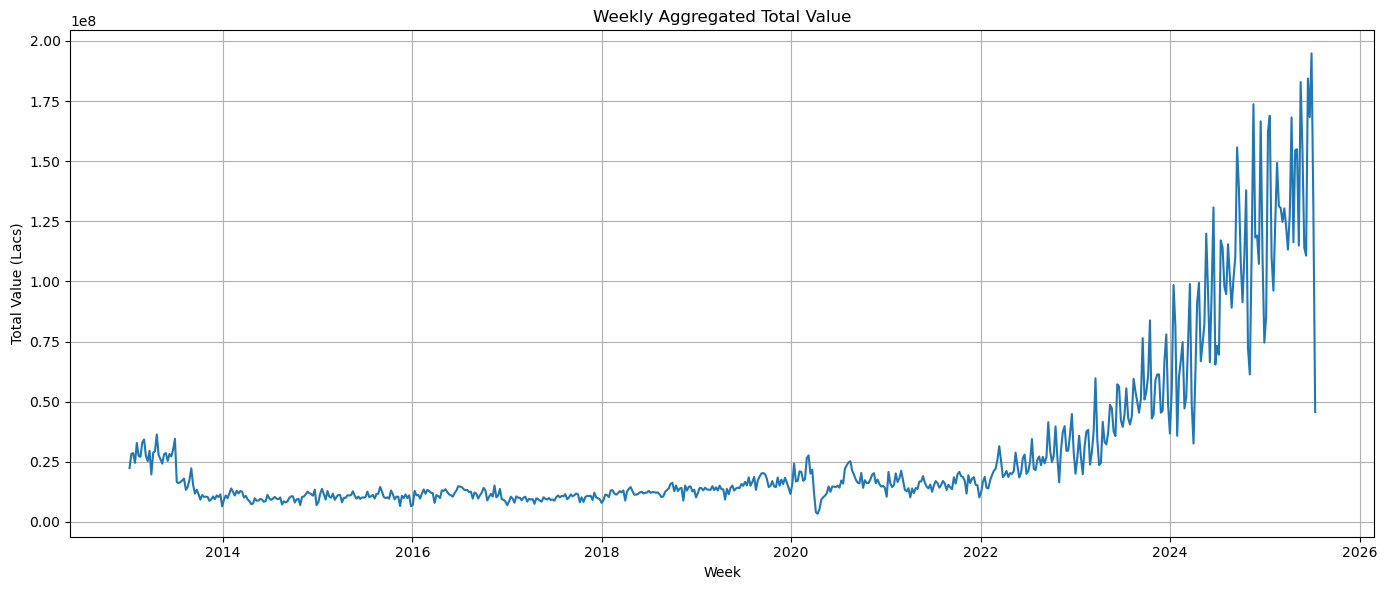

In [56]:
plt.figure(figsize=(14, 6))
plt.plot(weekly_df.index, weekly_df['Total Value (Lacs)'], label='Weekly Total Value')
plt.title('Weekly Aggregated Total Value')
plt.xlabel('Week')
plt.ylabel('Total Value (Lacs)')
plt.grid(True)
plt.tight_layout()
plt.show()

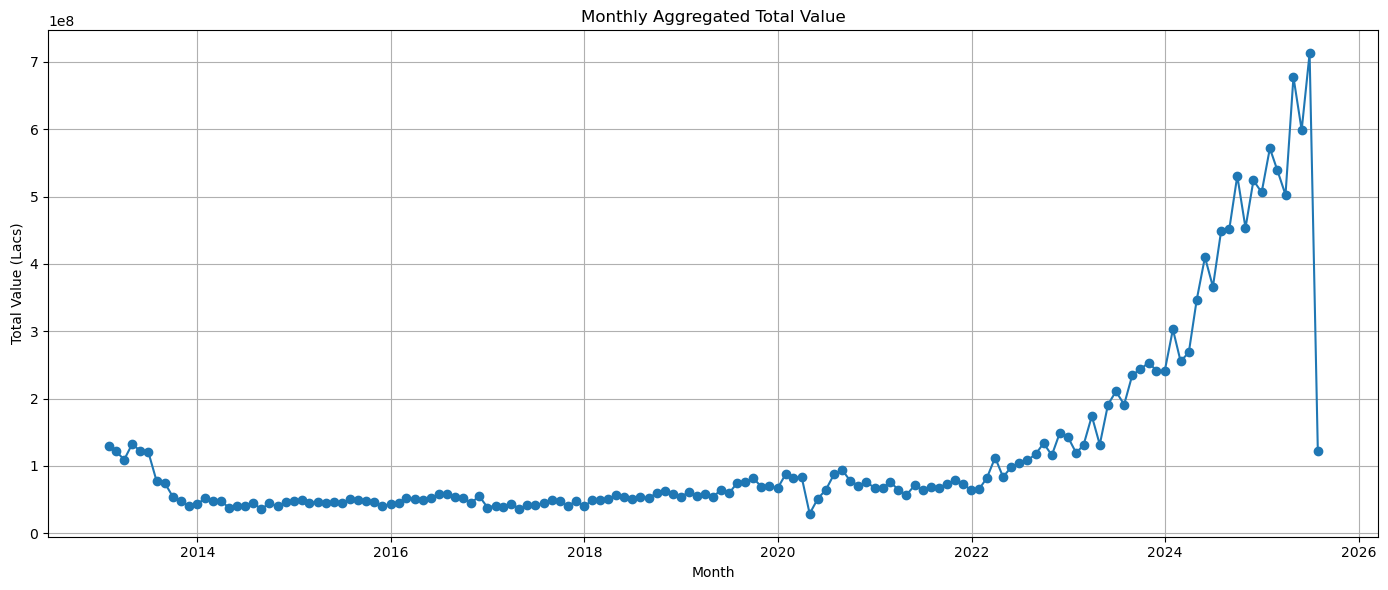

In [58]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_df.index, monthly_df['Total Value (Lacs)'], marker='o', label='Monthly Total Value')
plt.title('Monthly Aggregated Total Value')
plt.xlabel('Month')
plt.ylabel('Total Value (Lacs)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 6: Category Analysis by Instrument Type


C:\Users\Bhuvaneswaran\AppData\Local\Temp\ipykernel_150780\2704712823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=instrument_means.values, y=instrument_means.index, palette='viridis')


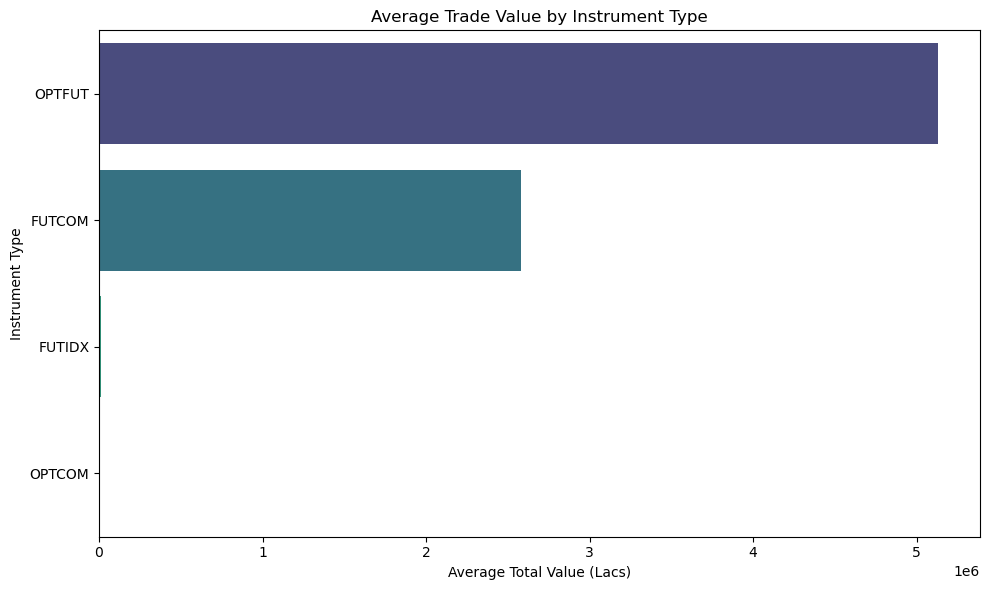

C:\Users\Bhuvaneswaran\AppData\Local\Temp\ipykernel_150780\2704712823.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Instrument Type', y='Total Value (Lacs)', palette='Set2')


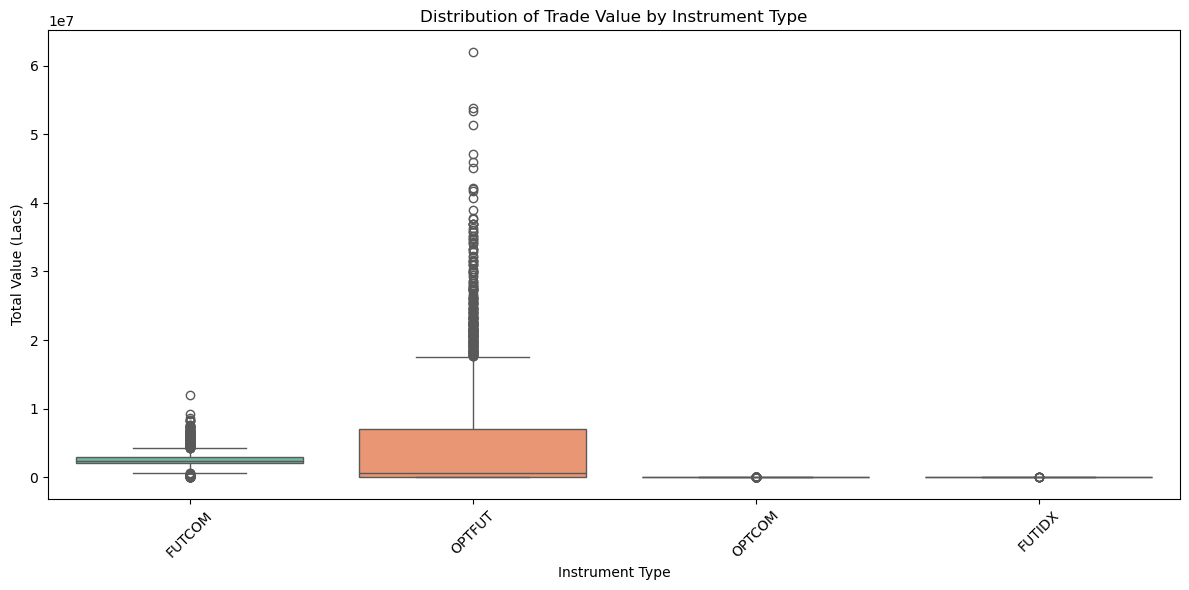

In [61]:
if 'Instrument Type' in df.columns:
    # Mean trade value by instrument type
    instrument_means = df.groupby('Instrument Type')['Total Value (Lacs)'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=instrument_means.values, y=instrument_means.index, palette='viridis')
    plt.title('Average Trade Value by Instrument Type')
    plt.xlabel('Average Total Value (Lacs)')
    plt.ylabel('Instrument Type')
    plt.tight_layout()
    plt.show()

    # Boxplot to visualize distribution
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Instrument Type', y='Total Value (Lacs)', palette='Set2')
    plt.title('Distribution of Trade Value by Instrument Type')
    plt.xlabel('Instrument Type')
    plt.ylabel('Total Value (Lacs)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Step 7: Correlation Heatmap

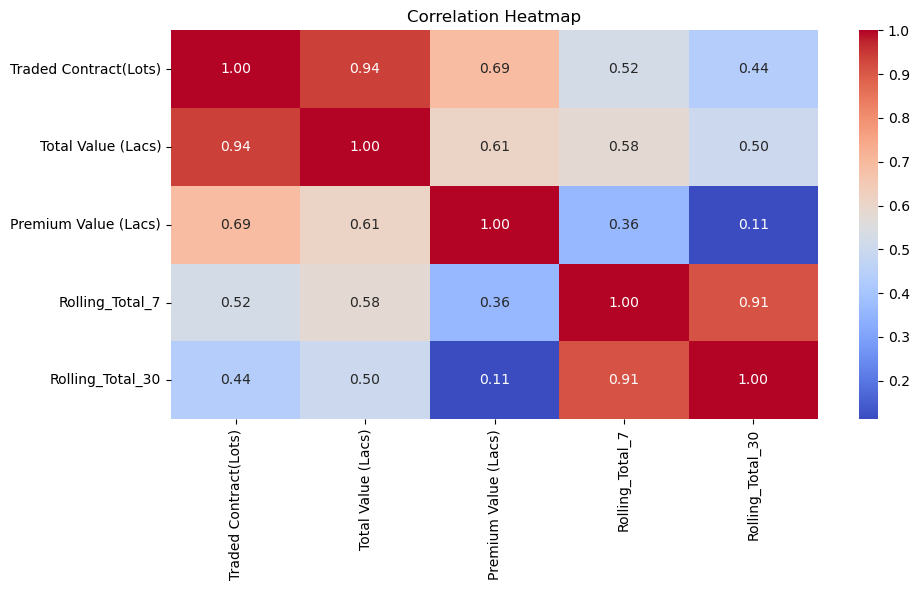

In [64]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Step 8: Pairplot of Numeric Features

In [69]:
numeric_df.columns

Index(['Traded Contract(Lots)', 'Total Value (Lacs)', 'Premium Value (Lacs)',
       'Rolling_Total_7', 'Rolling_Total_30'],
      dtype='object')

In [71]:
print("Duplicate column names:")
print(numeric_df.columns[numeric_df.columns.duplicated()])

Duplicate column names:
Index([], dtype='object')


In [73]:
print(numeric_df.index.duplicated().sum(), "duplicate index values")

3586 duplicate index values


In [75]:
numeric_df = numeric_df.reset_index(drop=True)

In [77]:
print(numeric_df.index.duplicated().sum(), "duplicate index values")

0 duplicate index values


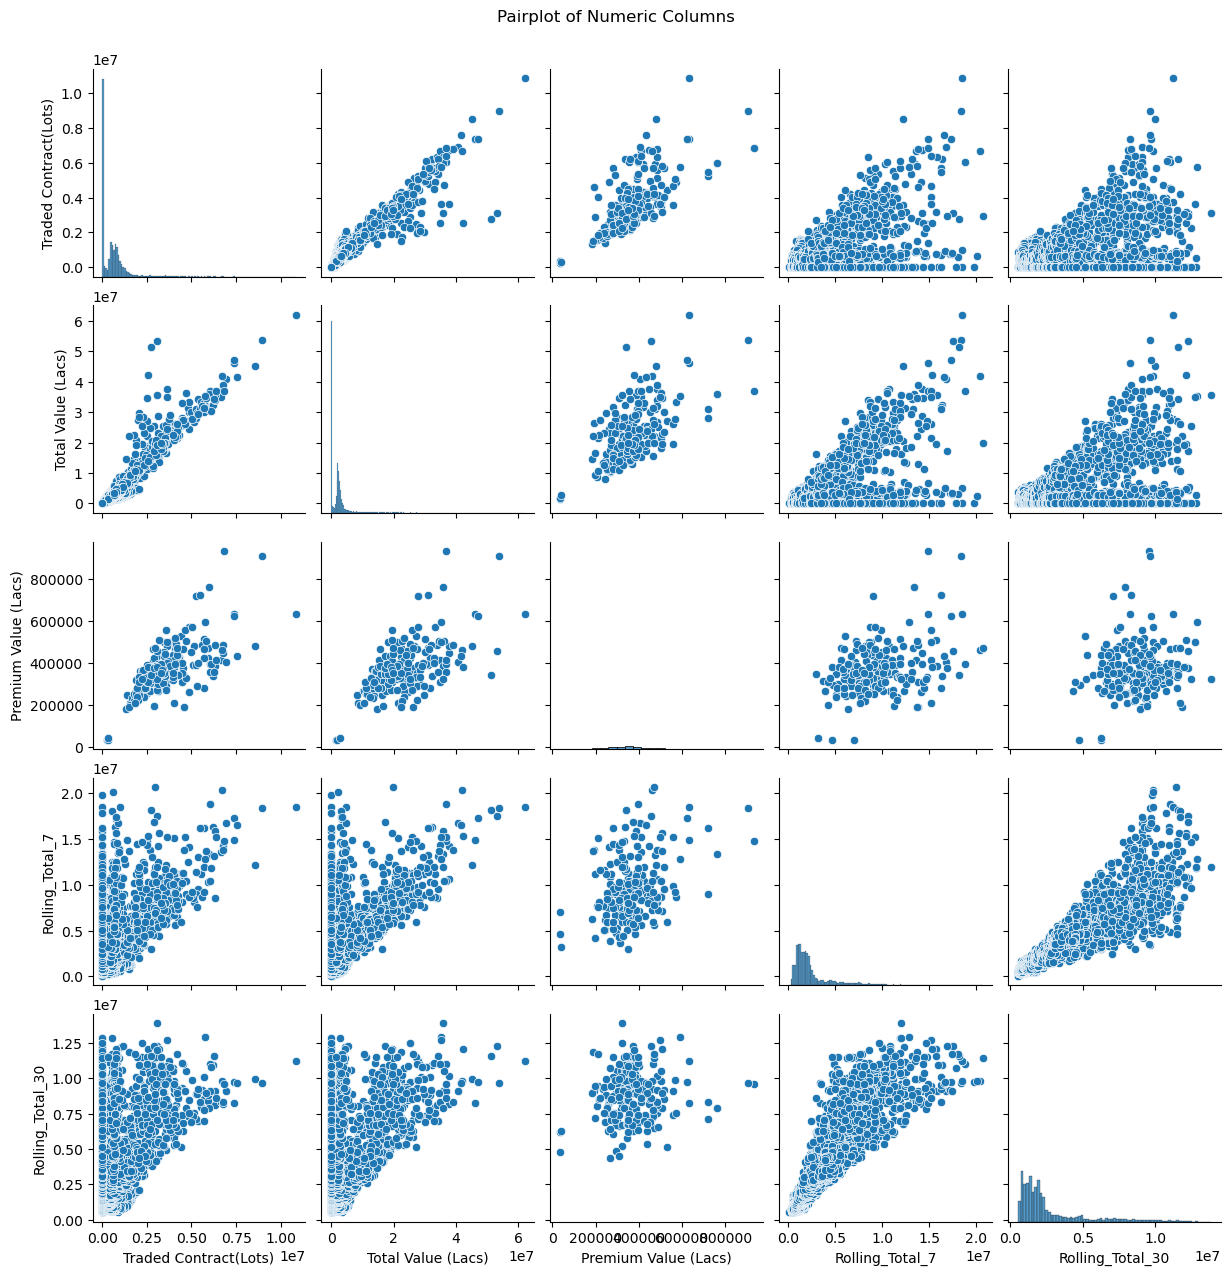

In [79]:
if len(numeric_df.columns) <= 6:
    sns.pairplot(numeric_df)
    plt.suptitle("Pairplot of Numeric Columns", y=1.02)
    plt.show()

## Step 9: Identify Anomalies - Top 1% Days by Total Value


Top 1% Anomaly Days by Total Value:
           Instrument Type  Total Value (Lacs)  Traded Contract(Lots)
Date                                                                 
2024-04-15          OPTFUT         26205508.32                3822038
2024-05-15          OPTFUT         34178650.04                5369699
2024-06-13          OPTFUT         29942171.67                4882275
2024-07-16          OPTFUT         31386219.96                4779570
2024-08-13          OPTFUT         33212341.11                5512135
...                    ...                 ...                    ...
2025-06-23          OPTFUT         35178038.03                5767407
2025-06-24          OPTFUT         35141003.98                3637640
2025-06-25          OPTFUT         35810081.69                3091185
2025-06-27          OPTFUT         42166751.42                2548712
2025-06-30          OPTFUT         51315816.50                2751590

[69 rows x 3 columns]


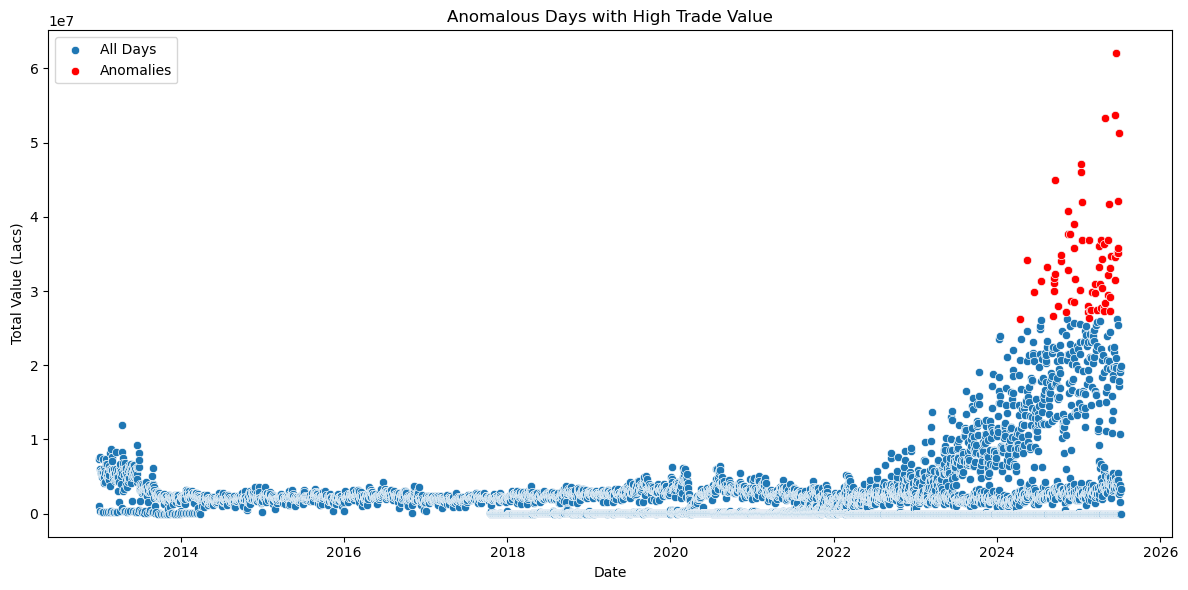

In [82]:
if 'Total Value (Lacs)' in df.columns:
    threshold = df['Total Value (Lacs)'].quantile(0.99)
    anomalies = df[df['Total Value (Lacs)'] > threshold]
    print("\nTop 1% Anomaly Days by Total Value:")
    print(anomalies[['Instrument Type', 'Total Value (Lacs)', 'Traded Contract(Lots)']])

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=df.index, y='Total Value (Lacs)', label='All Days')
    sns.scatterplot(data=anomalies, x=anomalies.index, y='Total Value (Lacs)', color='red', label='Anomalies')
    plt.title('Anomalous Days with High Trade Value')
    plt.xlabel('Date')
    plt.ylabel('Total Value (Lacs)')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Step 10: Comparative Feature Insights
 Re-load original for this step since 'Instrument Type' was lost during groupby

In [88]:
original_df = pd.read_csv("MCX_TRADE.csv")
original_df['Date'] = pd.to_datetime(original_df['Date'], dayfirst=True, errors='coerce')
original_df = original_df.dropna(subset=['Date'])

In [90]:
original_df

,Instrument Type,Date,Traded Contract(Lots),Total Value (Lacs),Premium Value (Lacs)
0,FUTCOM,2024-01-01,55674,193162.71,-
1,FUTIDX,2024-01-01,21,172.25,-
2,OPTFUT,2024-01-01,150532,840919.24,-
3,FUTIDX,2024-01-02,308,2533.69,-
4,FUTCOM,2024-01-02,595985,2020450.36,-
...,...,...,...,...,...
6864,OPTFUT,2025-07-07,3373566,19587718.89,367470.82
6865,FUTCOM,2025-07-07,663300,2878405.29,-
6866,OPTFUT,2025-07-08,3275049,19918411.74,352173.52
6867,FUTCOM,2025-07-08,665543,3309616.77,-


 Example 1: Trend comparison for specific Instrument Types (e.g., FUTCOM vs FUTIDX)

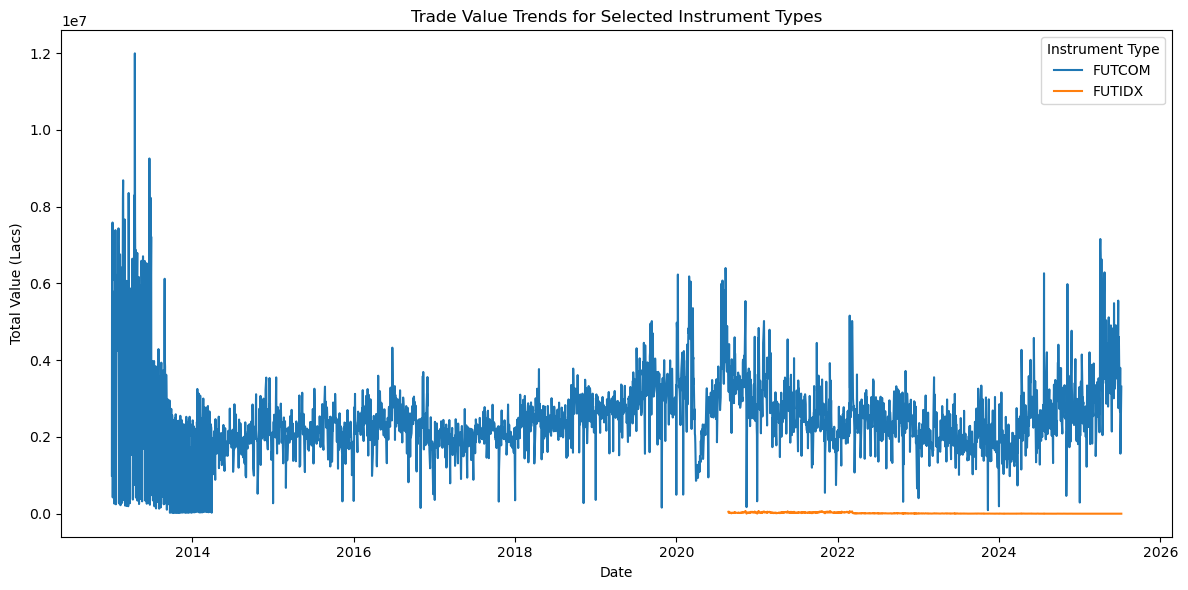

In [93]:
selected_types = ['FUTCOM', 'FUTIDX']
subset_df = original_df[original_df['Instrument Type'].isin(selected_types)]
subset_df = subset_df.groupby(['Date', 'Instrument Type'])['Total Value (Lacs)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset_df, x='Date', y='Total Value (Lacs)', hue='Instrument Type')
plt.title('Trade Value Trends for Selected Instrument Types')
plt.xlabel('Date')
plt.ylabel('Total Value (Lacs)')
plt.tight_layout()
plt.show()

Example 2: Compare activity by weekday (Mon-Sun)

C:\Users\Bhuvaneswaran\AppData\Local\Temp\ipykernel_150780\1524319726.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette='crest')


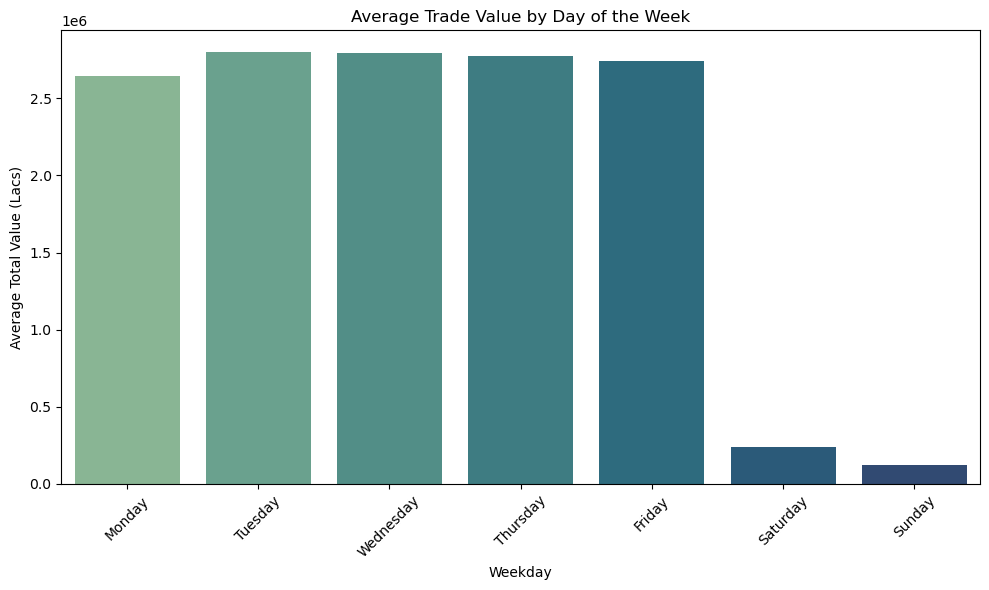

In [96]:
original_df['Weekday'] = original_df['Date'].dt.day_name()
weekday_avg = original_df.groupby('Weekday')['Total Value (Lacs)'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette='crest')
plt.title('Average Trade Value by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Average Total Value (Lacs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Example 3: Overlay Contracts and Value

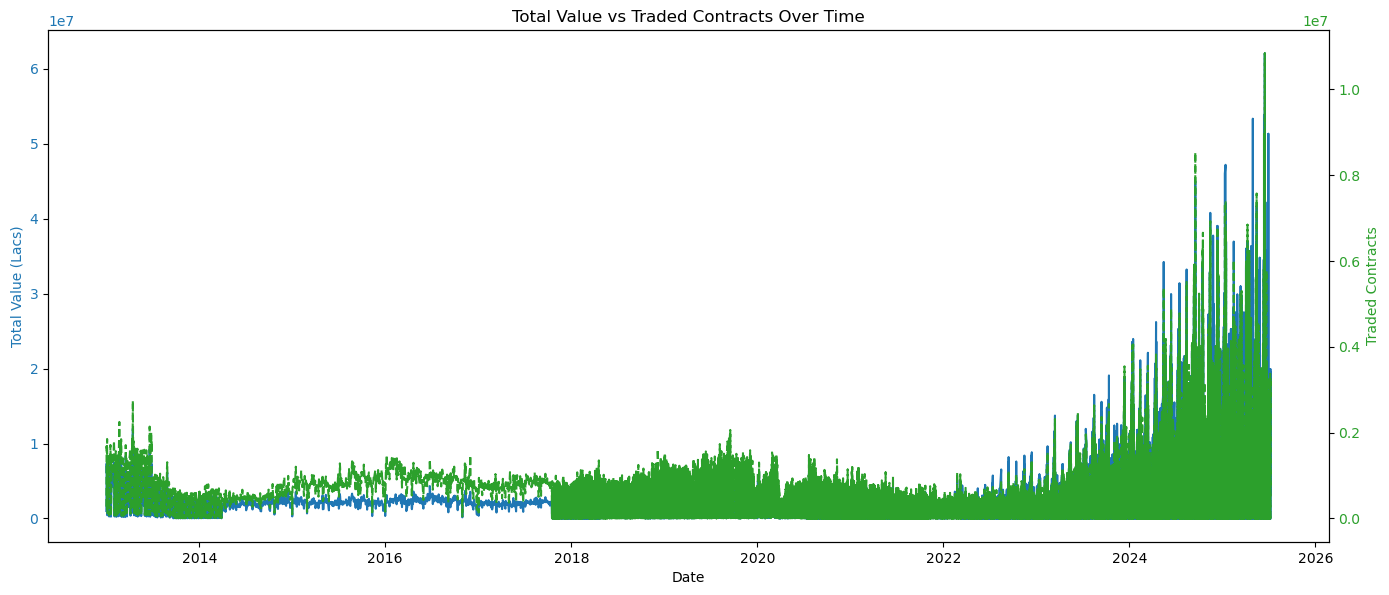

In [101]:
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Value (Lacs)', color=color)
ax1.plot(df.index, df['Total Value (Lacs)'], color=color, label='Total Value')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Traded Contracts', color=color)
ax2.plot(df.index, df['Traded Contract(Lots)'], color=color, label='Contracts', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Total Value vs Traded Contracts Over Time')
plt.show()